<a href="https://colab.research.google.com/github/maudlcrf/deep_learning/blob/main/Food_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work

## Import libraries

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import yaml

## Import dataset

Importing the dataset with the API generated by Roboflow with Mayra's account

In [23]:
from roboflow import Roboflow
rf = Roboflow(api_key="cBLWWZ4l2OGfXB6ucqNy")
project = rf.workspace("rahmanouri").project("objects_detection-t7zsg")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


Looking what is inside the path we imported.

#### Directory contents:
- 'valid': Directory containing validation images (images used to validate the model during training).
- 'README.dataset.txt': Text file with dataset-related information or instructions from Roboflow.
- 'train': Directory containing training images (images used to train the model).
- 'test': Directory containing test images (images used to evaluate the model's performance after training).
- 'data.yaml': YAML configuration file containing dataset-specific information such as class names, image size, etc.
- 'README.roboflow.txt': Text file with Roboflow-specific information or instructions, often regarding how the dataset was created or annotated.

In [24]:
dataset_path = "Objects_Detection--3"  # Adjust if necessary

if os.path.exists(dataset_path):
    print("Dataset directory exists!")
    print("Contents:")
    print(os.listdir(dataset_path))  # List files in the directory
else:
    print("Dataset directory not found!")

Dataset directory exists!
Contents:
['valid', 'README.dataset.txt', 'train', 'test', 'data.yaml', 'README.roboflow.txt']


The following code shows the number of elements in each folder.

In [28]:
def count_images(directory):
    """Count the number of image files in the given directory."""
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']  # List of common image file extensions
    image_count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
    return image_count

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Counting images in each directory
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)

# Display the counts
print(f"Train Set: {train_count} images")
print(f"Valid Set: {valid_count} images")
print(f"Test Set: {test_count} images")

Train Set: 9248 images
Valid Set: 667 images
Test Set: 416 images


With the following code the first images per each folder are displayed.

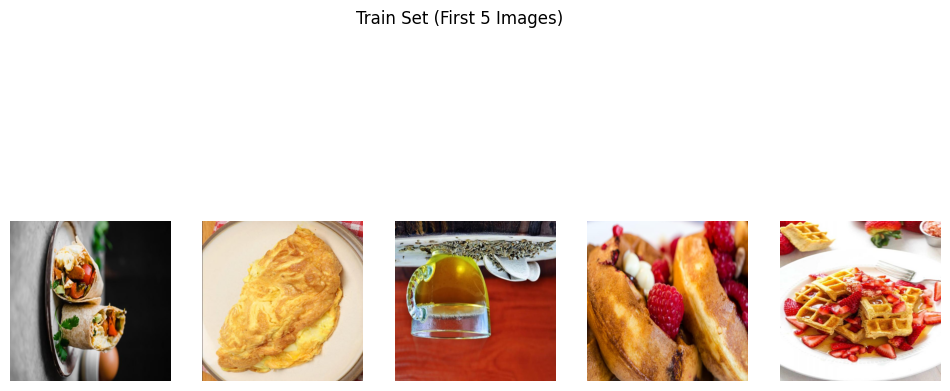

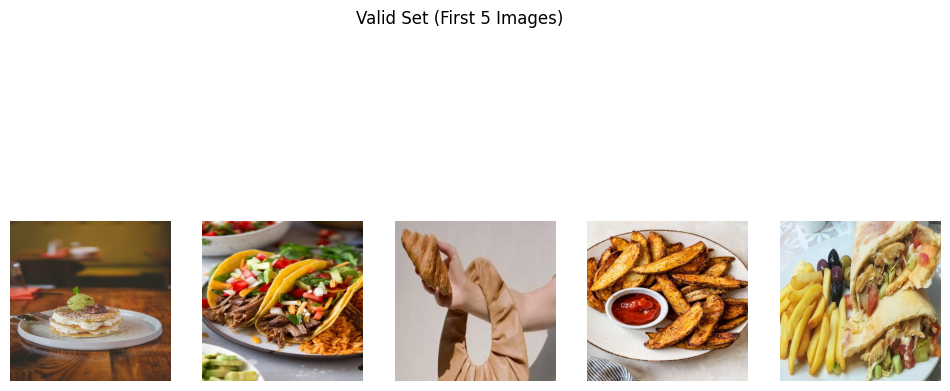

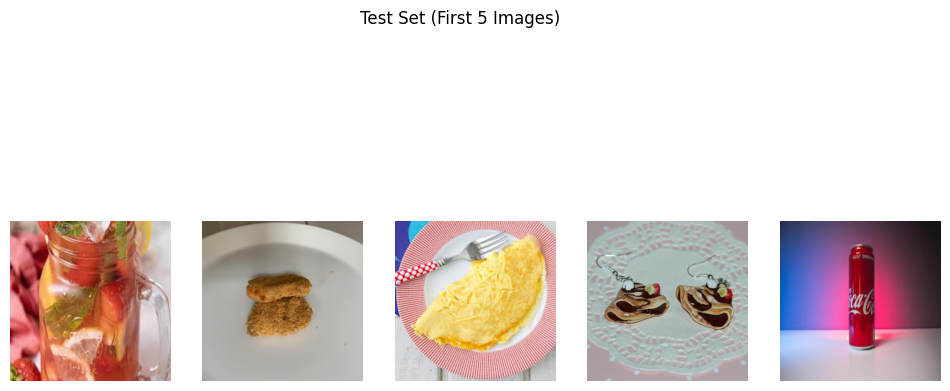

In [27]:
def display_first_few_images(directory, num_images=5):
    """Display the first few image files from the directory."""
    image_files = []
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']

    # Collect all image files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_files.append(os.path.join(root, file))

    # Display the first `num_images` files
    return image_files[:num_images]

# Path to the dataset directory
dataset_path = "Objects_Detection--3"  # Adjust this if necessary

# Directories for each dataset split
train_dir = os.path.join(dataset_path, 'train')
valid_dir = os.path.join(dataset_path, 'valid')
test_dir = os.path.join(dataset_path, 'test')

# Get first few images from each directory
train_images = display_first_few_images(train_dir)
valid_images = display_first_few_images(valid_dir)
test_images = display_first_few_images(test_dir)

# Function to display images
def plot_images(image_paths, title="Images"):
    plt.figure(figsize=(12, 6))
    for i, img_path in enumerate(image_paths):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(image_paths), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display the first few images from each set
plot_images(train_images, "Train Set (First 5 Images)")
plot_images(valid_images, "Valid Set (First 5 Images)")
plot_images(test_images, "Test Set (First 5 Images)")

The following code shows the number and different categories we have in the dataset.

In [30]:
# Path to the data.yaml file
yaml_path = "Objects_Detection--3/data.yaml"  # Adjust if necessary

# Load the YAML file
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Display the dataset information
print("Dataset Information:")
print(f"- Number of Classes: {len(data_yaml['names'])}")
print(f"- Classes: {data_yaml['names']}")

Dataset Information:
- Number of Classes: 42
- Classes: ['05L_Watter', 'Baguette_Farcie', 'Brownies', 'Burritos', 'Chesse_BreadSticks', 'Chichen_Poppers', 'Chicken Nugget', 'Chicken wing', 'Chicken_Poppers', 'Citronade', 'Coca_bottle', 'Fajitas', 'Fanta_Canette', 'Fanta_botlleS', 'Frittes', 'Garlic_BreadSticks', 'Humbrger', 'Jus_Kiwi', 'Jus_fraise', 'Large_pizza', 'Makloub', 'Medium_pizza', 'MilkChake', 'Mojito', 'Omelette', 'Pancake', 'Peperoni_Rolls', 'Pepsi', 'Potato_Wedges', 'Quesdillas', 'Salade', 'Smal_pizza', 'Tacos', 'Tacos_Mexicain', 'The', 'coca_Canette', 'crepes', 'croissant', 'orange-juice', 'pizza_meter', 'sprite', 'waffles']
